# TDrive Data

### Fields:  
    - Taxi id   : Integer
    - Date Time : Timestamp
    - Longitude : Double Precision
    - Latitude  : Double Precision

### Imports

In [116]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import LogFormatter 
import pandas as pd
import numpy as np
import folium
import os 
%matplotlib inline

### Read

In [10]:
def readFile(path):
    return pd.read_csv(path, infer_datetime_format=True,\
                       header=None, parse_dates=[1], \
                       names=['taxi_id', 'date_time', 'longitude', 'latitude'])

In [12]:
data = None
file_path = '../VERR/release/taxi_log_2008_by_id/1.txt'
data = readFile(file_path)

### Show

In [14]:
data.head()

,taxi_id,date_time,longitude,latitude
0,1,2008-02-02 15:36:08,116.51172,39.92123
1,1,2008-02-02 15:46:08,116.51135,39.93883
2,1,2008-02-02 15:46:08,116.51135,39.93883
3,1,2008-02-02 15:56:08,116.51627,39.91034
4,1,2008-02-02 16:06:08,116.47186,39.91248


In [16]:
data.tail()

,taxi_id,date_time,longitude,latitude
583,1,2008-02-08 15:11:31,116.48347,39.91954
584,1,2008-02-08 15:21:31,116.50789,39.93128
585,1,2008-02-08 15:31:31,116.53174,39.91536
586,1,2008-02-08 15:41:31,116.57156,39.90263
587,1,2008-02-08 15:51:31,116.54723,39.90841


### Plot Taxi Trip

In [26]:
rcParams['figure.figsize'] = 16,8

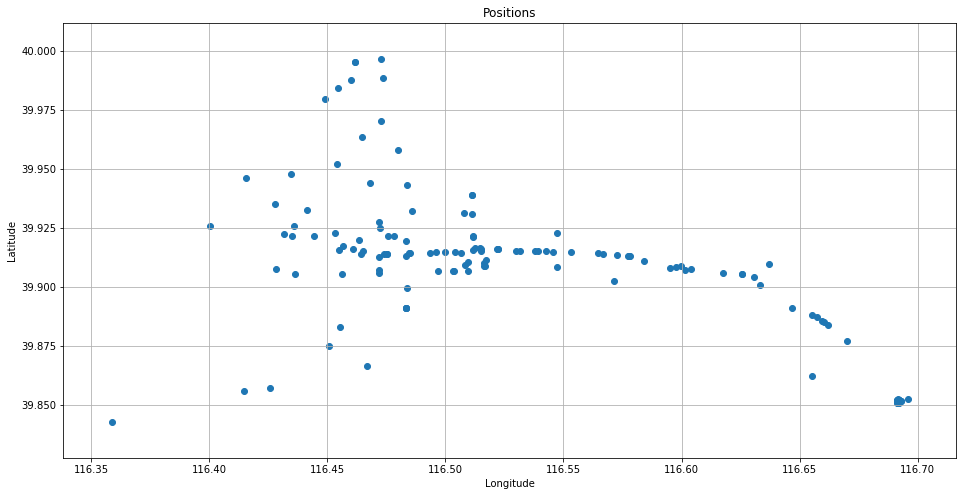

In [31]:
plt.scatter(data['longitude'], data['latitude'])
plt.title('Positions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

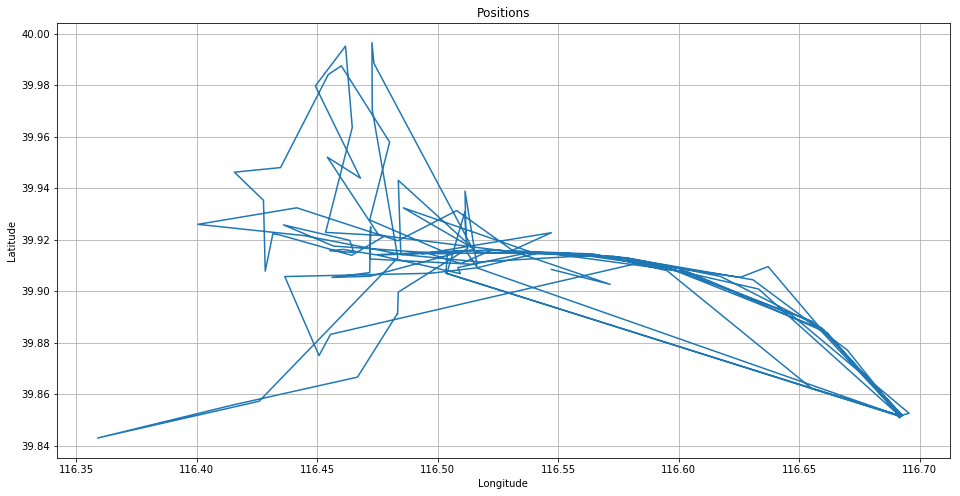

In [34]:
plt.plot(data['longitude'], data['latitude'])
plt.title('Positions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

### Density

In [130]:
xmin, xmax = 116.1, 117.1
ymin, ymax = 38.5, 40.3

x = np.array(data.longitude)
y = np.array(data.latitude)

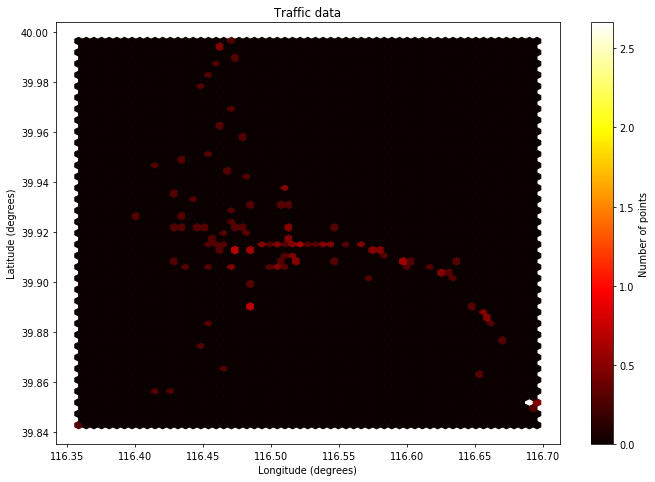

In [148]:
plt.figure(figsize = (10,7), dpi=70)
plt.hexbin(x,y,bins='log', gridsize=60, cmap=plt.cm.hot) 
plt.title("Traffic data")
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

cb = plt.colorbar()
cb.set_label('Number of points')

plt.tight_layout()
plt.show()

### Map

In [112]:
map_osm = folium.Map(location=[39.90, 116.40])
folium.Marker([39.82477, 116.33659], popup='1').add_to(map_osm)

In [113]:
for _, datetime, longitude, latitude in data.values: 
    folium.Marker([latitude, longitude], popup='teste').add_to(map_osm)

In [114]:
map_osm